In [1]:
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Flatten, Bidirectional
from keras.optimizers import Adam
from keras.models import Model
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.text import text_to_word_sequence
from keras.utils import np_utils
#sklearn imports
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


38237


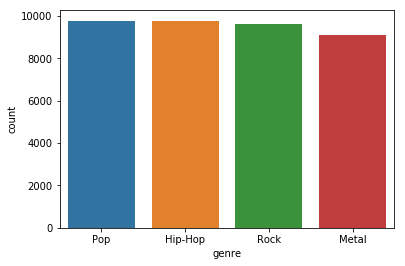

In [2]:
df = pd.read_pickle('10_word_seqs.pkl', compression='gzip')
print(len(df))
sns.countplot(df.genre)

In [3]:
#this value is the length of the longest song in our dataset.
MAX_VALUE = 10 #the length of each of our sequences
tok = Tokenizer(num_words=MAX_VALUE)
tok.fit_on_texts(df.lyrics)
#build sequences
sequences = tok.texts_to_sequences(df.lyrics)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=MAX_VALUE)
#sequences_matrix = sequences_matrix.reshape(38237, 10,1)



In [4]:
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = label_encoder.fit_transform(df.genre)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(sequences_matrix,onehot_encoded,test_size=0.2)

In [6]:
model = Sequential()
model.add(LSTM(128, input_shape=X_train[0].shape))
model.add(Dense(4, activation='softmax'))


ValueError: Input 0 is incompatible with layer lstm_1: expected ndim=3, found ndim=2

In [24]:
from keras.optimizers import RMSprop
from keras.callbacks import TensorBoard

tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                          write_graph=True, write_images=False)
optimizer = RMSprop(lr=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=100, batch_size=128, validation_data=(X_test, Y_test), shuffle=True, callbacks=[tensorboard])

Train on 30589 samples, validate on 7648 samples
Epoch 1/100
30589/30589 [==============================] - 4s 130us/step - loss: 1.3826 - acc: 0.2681 - val_loss: 1.3791 - val_acc: 0.2684
Epoch 2/100
30589/30589 [==============================] - 3s 110us/step - loss: 1.3729 - acc: 0.2889 - val_loss: 1.3716 - val_acc: 0.2984
Epoch 3/100
30589/30589 [==============================] - 3s 111us/step - loss: 1.3703 - acc: 0.2947 - val_loss: 1.3691 - val_acc: 0.2931
Epoch 4/100
30589/30589 [==============================] - 3s 110us/step - loss: 1.3690 - acc: 0.2961 - val_loss: 1.3749 - val_acc: 0.2909
Epoch 5/100
30589/30589 [==============================] - 4s 122us/step - loss: 1.3681 - acc: 0.2970 - val_loss: 1.3669 - val_acc: 0.3016
Epoch 6/100
30589/30589 [==============================] - 4s 116us/step - loss: 1.3671 - acc: 0.2960 - val_loss: 1.3669 - val_acc: 0.3075
Epoch 7/100
30589/30589 [==============================] - 3s 110us/step - loss: 1.3669 - acc: 0.2981 - val_loss: 1.3

In [25]:
model.save('10_word_seq_lstm.h5')

In [7]:
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=50, input_length=10))
model.add(LSTM(128))
model.add(Dense(4, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 50)            50000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               91648     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 516       
Total params: 142,164
Trainable params: 142,164
Non-trainable params: 0
_________________________________________________________________


In [8]:
from keras.optimizers import RMSprop
from keras.callbacks import TensorBoard

tensorboard = TensorBoard(log_dir='./logs/lstm_embed', histogram_freq=0,
                          write_graph=True, write_images=False)
optimizer = RMSprop(lr=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=100, batch_size=128, validation_data=(X_test, Y_test), shuffle=True, callbacks=[tensorboard])

Train on 30589 samples, validate on 7648 samples
Epoch 1/100
30589/30589 [==============================] - 5s 161us/step - loss: 1.3606 - acc: 0.3087 - val_loss: 1.3558 - val_acc: 0.3164
Epoch 2/100
30589/30589 [==============================] - 4s 139us/step - loss: 1.3519 - acc: 0.3218 - val_loss: 1.3551 - val_acc: 0.3254
Epoch 3/100
30589/30589 [==============================] - 5s 152us/step - loss: 1.3506 - acc: 0.3241 - val_loss: 1.3524 - val_acc: 0.3342
Epoch 4/100
30589/30589 [==============================] - 6s 198us/step - loss: 1.3497 - acc: 0.3288 - val_loss: 1.3518 - val_acc: 0.3317
Epoch 5/100
30589/30589 [==============================] - 7s 213us/step - loss: 1.3485 - acc: 0.3298 - val_loss: 1.3525 - val_acc: 0.3296
Epoch 6/100
30589/30589 [==============================] - 5s 176us/step - loss: 1.3475 - acc: 0.3303 - val_loss: 1.3512 - val_acc: 0.3283
Epoch 7/100
30589/30589 [==============================] - 5s 164us/step - loss: 1.3468 - acc: 0.3331 - val_loss: 1.3

30589/30589 [==============================] - 6s 191us/step - loss: 1.2606 - acc: 0.3916 - val_loss: 1.3849 - val_acc: 0.3329
Epoch 60/100
30589/30589 [==============================] - 5s 161us/step - loss: 1.2578 - acc: 0.3918 - val_loss: 1.3888 - val_acc: 0.3312
Epoch 61/100
30589/30589 [==============================] - 5s 163us/step - loss: 1.2556 - acc: 0.3939 - val_loss: 1.3855 - val_acc: 0.3279
Epoch 62/100
30589/30589 [==============================] - 5s 147us/step - loss: 1.2532 - acc: 0.3935 - val_loss: 1.3862 - val_acc: 0.3330
Epoch 63/100
30589/30589 [==============================] - 6s 181us/step - loss: 1.2510 - acc: 0.3970 - val_loss: 1.3846 - val_acc: 0.3308
Epoch 64/100
30589/30589 [==============================] - 6s 195us/step - loss: 1.2491 - acc: 0.3950 - val_loss: 1.3926 - val_acc: 0.3304
Epoch 65/100
30589/30589 [==============================] - 5s 163us/step - loss: 1.2472 - acc: 0.3945 - val_loss: 1.3938 - val_acc: 0.3339
Epoch 66/100
30589/30589 [=======

In [9]:
model.save('10_word_seq_lstm_embedding.h5')